In [1]:
import keras
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, SpatialDropout1D, Conv1D, GlobalMaxPooling1D, Embedding, GRU, LSTM
from keras.callbacks import EarlyStopping, ModelCheckpoint

from keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
import os
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

from gensim.models.word2vec import Word2Vec

from sklearn.manifold import TSNE

import pandas as pd
import numpy as np

In [2]:
data = pd.read_pickle('./datasets/train_data_200.pickle')
data_test = pd.read_pickle('./datasets/test_data_200.pickle')

In [3]:
texts = [' '.join(d) for d in data['text'].to_list()]
labels = data['genre'].to_list()

texts_test = [' '.join(d) for d in data_test['text'].to_list()]
labels_test = data_test['genre'].to_list()

In [4]:
texts

["чэндлеp раймонд глубокий сон 1 половина октябрь около одиннадцать утро хмурый типичный это время год предгорие день предвещать холодный секущий дождь светлоголубой рубашка соответствовать галстук платочек кармашек чёрный брюки чёрный носка голубой узор элегантный чистый свежевыбритый полный спокойствие беспокоиться впечатление это производить выглядеть точно должный выглядеть одетый частный детектив идти визит четыре миллион доллар большой холл семейный дом стернвуд этаж высота дверь который легко пройти стадо индийский слон размещаться витраж изображать рыцарь чёрный лата спасать дама привязать дерево дама раздетый нагоя тело окутывать покрывало волос удобство рыцарь поднять забрало пытаться усилие развязать верёвка который дама привязать дерево смотреть витраж думать жить дом рано поздно прийтись влезть наверх помочь рыцарь похоже делать свой дело всерьёз огромный застеклить дверь сторона холл широкий изумрудный газон простираться вплоть белый гараж который молодой щуплый черноволо

In [5]:
texts_test

['кейся хилла табу пролог залив сан-франциско калифорния рискнуть рейли умолять забыть джесс стать делать понятно рейли идти дорога тянуться школа дом вслед младший сестра бежать вприпрыжку толстенький короткий косичка задорно подпрыгивать такт шаг рейли терпеть мочь забирать младший сестра школа это время друг прогуливаться мол вместо присоединиться должный забирать джесс провожать дом кормить усаживать урок отец требовать держаться далёкий добавить впереди ярд двадцать медленно ходить конец конец свой двор старик сгребать опасть лист сгорбить старый фланелевый рубашка грязный комбинезон сжимать мозолистый заскорузлый ладонь рукоятка грабли стоять осень лист желтеть опадать дерево солнце каждый день подниматься небо ниже джесс посмотреть рейли ясный голубой глаз сестрёнка шаловливо поблескивать бросить ты… сказать что-нибудь слышать говорить должный разговаривать это человек почему рейли раздражённо фыркнуть « почему » джесс почему должный разговаривать мистер рейнолдсом рейли взгляну

In [6]:
maxlen = 200
max_words = 10000

In [7]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [8]:
tokenizer_test = Tokenizer(num_words=max_words)
tokenizer_test.fit_on_texts(texts_test)
sequences_test = tokenizer.texts_to_sequences(texts_test)

In [9]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 53219 unique tokens.


In [10]:
word_index_test = tokenizer_test.word_index
print('Found %s unique tokens.' % len(word_index_test))

Found 18487 unique tokens.


In [11]:
d = pad_sequences(sequences, maxlen=maxlen)
d_test = pad_sequences(sequences_test, maxlen=maxlen)

In [12]:
labels = np.asarray(labels)
print('Shape of data tensor:', d.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (7282, 200)
Shape of label tensor: (7282,)


In [13]:
labels_test = np.asarray(labels_test)
print('Shape of data tensor:', d_test.shape)
print('Shape of label tensor:', labels_test.shape)

Shape of data tensor: (912, 200)
Shape of label tensor: (912,)


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(d, labels,
                                                    train_size=0.67,
                                                    random_state=42,
                                                    stratify=labels)
print(f"Количество строк в y_train по классам: {np.bincount(y_train)}")
print(f"Количество строк в y_test по классам: {np.bincount(y_test)}")

Количество строк в y_train по классам: [1336 2651  891]
Количество строк в y_test по классам: [ 658 1306  440]


In [15]:
X_train_test, X_test_test, y_train_test, y_test_test = train_test_split(d_test, labels_test,
                                                    train_size=3,
                                                    random_state=42,
                                                    stratify=labels_test)
print(f"Количество строк в y_train по классам: {np.bincount(y_train_test)}")
print(f"Количество строк в y_test по классам: {np.bincount(y_test_test)}")

Количество строк в y_train по классам: [1 1 1]
Количество строк в y_test по классам: [314 362 233]


In [16]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_test_test = to_categorical(y_test_test)

In [17]:
# sentences = list(map(list, data['text'].to_list()))
# model_w2v = Word2Vec(sentences=sentences, vector_size=100, sg=0, window=10, epochs=5, min_count=10, workers=4)
# model_w2v.save('./models/model_w2v.w2v')
model_w2v = Word2Vec.load('./models/model_w2v.w2v')

In [18]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        if word in model_w2v.wv.key_to_index:
            embedding_vector = model_w2v.wv.get_vector(word)
        else:
            embedding_vector = np.zeros(embedding_dim)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [19]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.1888762 ,  0.58320308,  0.26507655, ..., -1.25532854,
         0.11306992,  1.24214518],
       [-1.6713419 ,  0.989887  ,  0.1383269 , ..., -0.55382746,
        -0.04980406,  0.47990805],
       ...,
       [-0.03602665,  0.12445448,  0.06156644, ..., -0.13681443,
         0.06839494,  0.13190131],
       [ 0.00232697,  0.03287196,  0.04246398, ..., -0.04966859,
        -0.06785379,  0.10233437],
       [-0.0894557 ,  0.19240478,  0.1181412 , ..., -0.15561093,
         0.0688927 ,  0.11995248]])

In [20]:
output_dir_ann = 'model_output/dense/'
# обучение:
epochs_ann = 10
batch_size_ann = 64
# архитектура полносвязанной сети:
n_dense_ann = 100
dropout_ann = 0.5

In [21]:
output_dir_cnn = 'model_output/cnn/'
# обучение:
epochs_cnn = 10
batch_size_cnn = 128

# архитектура сверточного слоя:
n_conv = 256  # фильтры, они же ядра
k_conv = 3  # длина ядра

# архитектура полносвязанного слоя:
n_dense_cnn = 256
dropout_cnn = 0.2

In [22]:
output_dir_gru = 'model_output/gru/'
# обучение:
epochs_gru = 10
batch_size_gru = 64
# архитектура полносвязанной сети:
drop_embed_gru = 0.2
n_gru = 256
drop_gru = 0.2

In [23]:
# имя каталога для сохранения результатов:
output_dir_lstm = 'model_output/lstm/'
# обучение:
epochs_lstm = 10
batch_size_lstm = 64
# архитектура полносвязанной сети:
drop_embed_lstm = 0.2
n_lstm = 256
drop_lstm = 0.2

In [24]:
model_ann = Sequential()
model_ann.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model_ann.add(Flatten())
model_ann.add(Dense(n_dense_ann, activation='relu'))
model_ann.add(Dropout(dropout_ann))
model_ann.add(Dense(n_dense_ann, activation='relu'))
model_ann.add(Dropout(dropout_ann))
model_ann.add(Dense(3, activation='softmax'))
model_ann.layers[0].set_weights([embedding_matrix])
model_ann.layers[0].trainable = False

model_ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 100)          1000000   
                                                                 
 flatten (Flatten)           (None, 20000)             0         
                                                                 
 dense (Dense)               (None, 100)               2000100   
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 3)                 3

In [25]:
model_cnn = Sequential()
model_cnn.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model_cnn.add(SpatialDropout1D(0.2))
model_cnn.add(Conv1D(n_conv, k_conv, activation='relu'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(n_dense_cnn, activation='relu'))
model_cnn.add(Dropout(dropout_cnn))
model_cnn.add(Dense(3, activation='softmax'))
model_cnn.layers[0].set_weights([embedding_matrix])
model_cnn.layers[0].trainable = False

model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 100)          1000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 100)         0         
 ropout1D)                                                       
                                                                 
 conv1d (Conv1D)             (None, 198, 256)          77056     
                                                                 
 global_max_pooling1d (Globa  (None, 256)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dropout_2 (Dropout)         (None, 256)              

In [26]:
model_gru = Sequential()
model_gru.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model_gru.add(SpatialDropout1D(drop_embed_gru))
model_gru.add(GRU(n_gru, dropout=drop_gru))
model_gru.add(Dense(3, activation='softmax'))
model_gru.layers[0].set_weights([embedding_matrix])
model_gru.layers[0].trainable = False

model_gru.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 100)          1000000   
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 200, 100)         0         
 lDropout1D)                                                     
                                                                 
 gru (GRU)                   (None, 256)               274944    
                                                                 
 dense_5 (Dense)             (None, 3)                 771       
                                                                 
Total params: 1,275,715
Trainable params: 275,715
Non-trainable params: 1,000,000
_________________________________________________________________


In [27]:
model_lstm = Sequential()
model_lstm.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model_lstm.add(SpatialDropout1D(drop_embed_lstm))
model_lstm.add(LSTM(n_lstm, dropout=drop_lstm))
model_lstm.add(Dense(3, activation='softmax'))
model_lstm.layers[0].set_weights([embedding_matrix])
model_lstm.layers[0].trainable = False

model_lstm.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 200, 100)          1000000   
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 200, 100)         0         
 lDropout1D)                                                     
                                                                 
 lstm (LSTM)                 (None, 256)               365568    
                                                                 
 dense_6 (Dense)             (None, 3)                 771       
                                                                 
Total params: 1,366,339
Trainable params: 366,339
Non-trainable params: 1,000,000
_________________________________________________________________


In [28]:
callbacks_ann = [EarlyStopping(monitor='val_loss', patience=2),
                 ModelCheckpoint(filepath=output_dir_ann + '200_best_model.h5', monitor='val_loss', save_best_only=True)]
callbacks_cnn = [EarlyStopping(monitor='val_loss', patience=2),
                 ModelCheckpoint(filepath=output_dir_cnn + '200_best_model.h5', monitor='val_loss', save_best_only=True)]
callbacks_gru = [EarlyStopping(monitor='val_loss', patience=2),
                 ModelCheckpoint(filepath=output_dir_gru + '200_best_model.h5', monitor='val_loss', save_best_only=True)]
callbacks_lstm = [EarlyStopping(monitor='val_loss', patience=2),
                  ModelCheckpoint(filepath=output_dir_lstm + '200_best_model.h5', monitor='val_loss', save_best_only=True)]

In [29]:
model_ann.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['acc'])

history_ann = model_ann.fit(X_train, y_train,
                            epochs=10,
                            batch_size=batch_size_ann,
                            validation_split=0.2,
                            callbacks=callbacks_ann)

Epoch 1/10
61/61 [==============================] - 4s 38ms/step - loss: 0.8958 - acc: 0.6199 - val_loss: 0.5778 - val_acc: 0.7561
Epoch 2/10
61/61 [==============================] - 3s 42ms/step - loss: 0.6723 - acc: 0.7266 - val_loss: 0.5382 - val_acc: 0.7756
Epoch 3/10
61/61 [==============================] - 2s 32ms/step - loss: 0.5404 - acc: 0.7752 - val_loss: 0.5107 - val_acc: 0.8145
Epoch 4/10
61/61 [==============================] - 2s 34ms/step - loss: 0.4648 - acc: 0.8145 - val_loss: 0.4502 - val_acc: 0.8207
Epoch 5/10
61/61 [==============================] - 2s 25ms/step - loss: 0.3927 - acc: 0.8419 - val_loss: 0.4333 - val_acc: 0.8289
Epoch 6/10
61/61 [==============================] - 2s 29ms/step - loss: 0.3632 - acc: 0.8652 - val_loss: 0.4171 - val_acc: 0.8443
Epoch 7/10
61/61 [==============================] - 2s 28ms/step - loss: 0.3273 - acc: 0.8731 - val_loss: 0.4331 - val_acc: 0.8176
Epoch 8/10
61/61 [==============================] - 2s 27ms/step - loss: 0.2864 - a

In [30]:
model_cnn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['acc'])
history_cnn = model_cnn.fit(X_train, y_train,
                            epochs=10,
                            batch_size=batch_size_cnn,
                            validation_split=0.2,
                            callbacks=callbacks_cnn)


Epoch 1/10
31/31 [==============================] - 8s 216ms/step - loss: 0.9022 - acc: 0.6220 - val_loss: 0.5131 - val_acc: 0.7807
Epoch 2/10
31/31 [==============================] - 5s 173ms/step - loss: 0.5292 - acc: 0.7665 - val_loss: 0.4164 - val_acc: 0.8443
Epoch 3/10
31/31 [==============================] - 5s 174ms/step - loss: 0.4273 - acc: 0.8247 - val_loss: 0.3635 - val_acc: 0.8617
Epoch 4/10
31/31 [==============================] - 5s 161ms/step - loss: 0.3531 - acc: 0.8570 - val_loss: 0.3157 - val_acc: 0.8740
Epoch 5/10
31/31 [==============================] - 5s 162ms/step - loss: 0.2958 - acc: 0.8849 - val_loss: 0.2785 - val_acc: 0.8863
Epoch 6/10
31/31 [==============================] - 5s 171ms/step - loss: 0.2612 - acc: 0.8988 - val_loss: 0.3229 - val_acc: 0.8740
Epoch 7/10
31/31 [==============================] - 5s 162ms/step - loss: 0.2380 - acc: 0.9036 - val_loss: 0.2561 - val_acc: 0.8945
Epoch 8/10
31/31 [==============================] - 5s 162ms/step - loss: 0.

In [31]:
model_gru.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['acc'])
history_gru = model_gru.fit(X_train, y_train,
                            epochs=epochs_gru,
                            batch_size=batch_size_gru,
                            validation_split=0.2,
                            callbacks=callbacks_gru)


Epoch 1/10
61/61 [==============================] - 41s 630ms/step - loss: 0.7954 - acc: 0.6497 - val_loss: 0.4998 - val_acc: 0.7951
Epoch 2/10
61/61 [==============================] - 39s 638ms/step - loss: 0.5260 - acc: 0.7783 - val_loss: 0.3995 - val_acc: 0.8238
Epoch 3/10
61/61 [==============================] - 38s 629ms/step - loss: 0.4539 - acc: 0.8132 - val_loss: 0.3038 - val_acc: 0.8750
Epoch 4/10
61/61 [==============================] - 38s 631ms/step - loss: 0.3319 - acc: 0.8644 - val_loss: 0.2807 - val_acc: 0.8852
Epoch 5/10
61/61 [==============================] - 38s 625ms/step - loss: 0.3070 - acc: 0.8757 - val_loss: 0.2262 - val_acc: 0.9170
Epoch 6/10
61/61 [==============================] - 38s 630ms/step - loss: 0.2467 - acc: 0.9024 - val_loss: 0.2192 - val_acc: 0.9201
Epoch 7/10
61/61 [==============================] - 38s 626ms/step - loss: 0.2163 - acc: 0.9134 - val_loss: 0.2052 - val_acc: 0.9150
Epoch 8/10
61/61 [==============================] - 40s 660ms/step - 

In [32]:
model_lstm.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['acc'])
history_lstm = model_lstm.fit(X_train, y_train,
                              epochs=epochs_lstm,
                              batch_size=batch_size_lstm,
                              validation_split=0.2,
                              callbacks=callbacks_lstm)


Epoch 1/10
61/61 [==============================] - 60s 949ms/step - loss: 0.7501 - acc: 0.6953 - val_loss: 0.7658 - val_acc: 0.6885
Epoch 2/10
61/61 [==============================] - 61s 1s/step - loss: 0.6912 - acc: 0.7237 - val_loss: 0.5260 - val_acc: 0.8043
Epoch 3/10
61/61 [==============================] - 65s 1s/step - loss: 0.5477 - acc: 0.7775 - val_loss: 0.4077 - val_acc: 0.8412
Epoch 4/10
61/61 [==============================] - 60s 986ms/step - loss: 0.5164 - acc: 0.7957 - val_loss: 0.5471 - val_acc: 0.7859
Epoch 5/10
61/61 [==============================] - 58s 955ms/step - loss: 0.5205 - acc: 0.7829 - val_loss: 0.4844 - val_acc: 0.8176


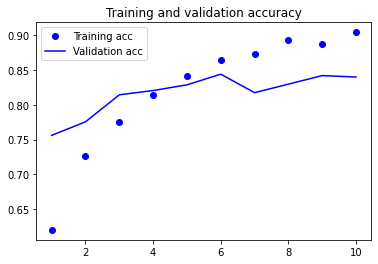

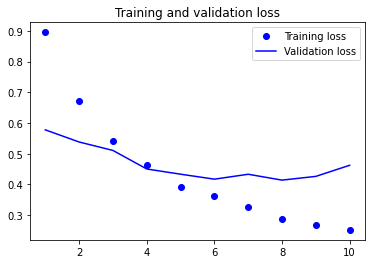

In [33]:
acc = history_ann.history['acc']
val_acc = history_ann.history['val_acc']
loss = history_ann.history['loss']
val_loss = history_ann.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

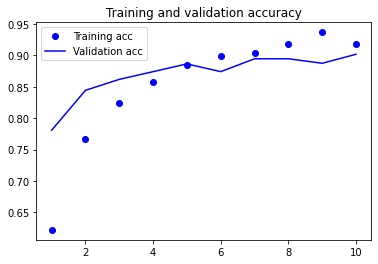

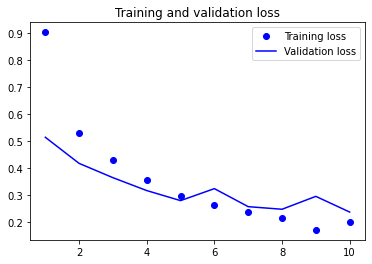

In [34]:
acc = history_cnn.history['acc']
val_acc = history_cnn.history['val_acc']
loss = history_cnn.history['loss']
val_loss = history_cnn.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

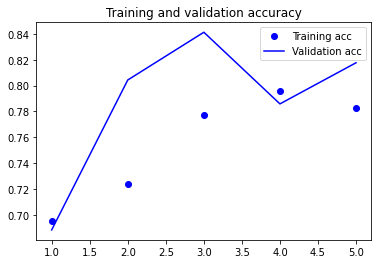

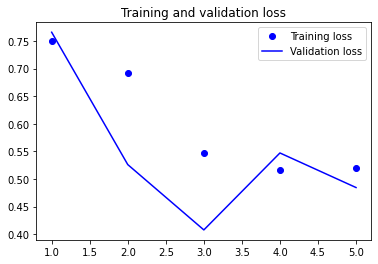

In [35]:
acc = history_lstm.history['acc']
val_acc = history_lstm.history['val_acc']
loss = history_lstm.history['loss']
val_loss = history_lstm.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

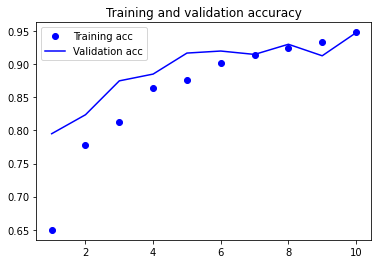

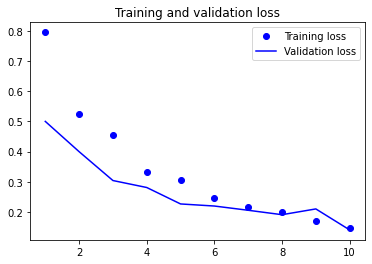

In [36]:
acc = history_gru.history['acc']
val_acc = history_gru.history['val_acc']
loss = history_gru.history['loss']
val_loss = history_gru.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [37]:
model_ann.load_weights(output_dir_ann + '200_best_model.h5')
model_cnn.load_weights(output_dir_cnn + '200_best_model.h5')
model_lstm.load_weights(output_dir_lstm + '200_best_model.h5')
model_gru.load_weights(output_dir_gru + '200_best_model.h5')

In [38]:
model_ann.evaluate(X_test, y_test)

76/76 [==============================] - 0s 6ms/step - loss: 0.4514 - acc: 0.8319


[0.45135828852653503, 0.8319467306137085]

In [39]:
model_ann.evaluate(X_test_test, y_test_test)

29/29 [==============================] - 0s 6ms/step - loss: 1.0517 - acc: 0.5127


[1.0517243146896362, 0.512651264667511]

In [40]:
model_cnn.evaluate(X_test, y_test)

76/76 [==============================] - 1s 12ms/step - loss: 0.2301 - acc: 0.9072


[0.23007898032665253, 0.9072379469871521]

In [41]:
model_cnn.evaluate(X_test_test, y_test_test)

29/29 [==============================] - 0s 13ms/step - loss: 1.3360 - acc: 0.4950


[1.3360049724578857, 0.49504950642585754]

In [42]:
model_lstm.evaluate(X_test, y_test)

76/76 [==============================] - 18s 232ms/step - loss: 0.4212 - acc: 0.8116


[0.4212322235107422, 0.8115640878677368]

In [43]:
model_lstm.evaluate(X_test_test, y_test_test)

29/29 [==============================] - 7s 232ms/step - loss: 1.0464 - acc: 0.5941


[1.0463799238204956, 0.594059407711029]

In [44]:
model_gru.evaluate(X_test, y_test)

76/76 [==============================] - 8s 109ms/step - loss: 0.1524 - acc: 0.9422


[0.15239951014518738, 0.9421796798706055]

In [45]:
model_gru.evaluate(X_test_test, y_test_test)

29/29 [==============================] - 3s 108ms/step - loss: 1.4720 - acc: 0.4873


[1.4720100164413452, 0.487348735332489]

In [46]:
predicted_ann = model_ann.predict(X_test)
predicted_cnn = model_cnn.predict(X_test)
predicted_gru = model_gru.predict(X_test)
predicted_lstm = model_lstm.predict(X_test)

In [47]:
GENRES = {'detective': 0,
          'fantasy': 1,
          'sci-fi': 2
          }
genres_list = ['detective', 'fantasy', 'sci-fi']

In [48]:
genres_ann = []
for i in predicted_ann[:5]:
    genres_ann.append(genres_list[i.argmax()])

In [49]:
genres_cnn = []
for i in predicted_cnn[:5]:
    genres_cnn.append(genres_list[i.argmax()])

In [50]:
genres_lstm = []
for i in predicted_lstm[:5]:
    genres_lstm.append(genres_list[i.argmax()])

In [51]:
genres_gru = []
for i in predicted_gru[:5]:
    genres_gru.append(genres_list[i.argmax()])

In [52]:
genres_ann

['sci-fi', 'detective', 'fantasy', 'fantasy', 'fantasy']

In [53]:
genres_cnn

['sci-fi', 'detective', 'fantasy', 'fantasy', 'fantasy']

In [54]:
genres_lstm

['fantasy', 'detective', 'fantasy', 'sci-fi', 'fantasy']

In [55]:
genres_gru

['sci-fi', 'detective', 'fantasy', 'sci-fi', 'fantasy']

In [56]:
y_test[:5]

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [57]:
text = tokenizer.sequences_to_texts(X_test[:5])

In [58]:
text

['узнать а а а сознание беззвучно ахнуть увидеть яд свой джессика проникнуть структура кислород позволить присоединиться свободный прикрепить пойти изменение быстрый быстрый словно свой прикосновение вызвать реакция остановиться время ослабить хватка ощутить движение трубка по прежнему касаться рот мягко впитывать капля влага чейня воспользоваться тело изменить структура яд кто то помочь сесть видеть преподобный мать усадить рядом покрыть ковёр возвышение сухой рука прикоснуться шея сознание появиться частица джессика попытаться оттолкнуть частица близкий это полный существовать одновременно человек проникновение разум старый преподобный мать джессика увидеть преподобный мать вовсе видеть старуха взор объединиться сознание предстать иной образ искриться жизнь молоденький девушка мягкий общий разум прозвучать голос девушка джессика мочь воспринимать слово отвечать скоро это твой джессика продолжать внутренний голос это сказать джессика знать поспешить сопротивляться мало время мы… после